In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('BreastCancerData/breast-cancer-wisconsin.data')

In [3]:
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
columnnames = ['id', 'ClumpThickness', 'UniformityCellSize',
               'UniformityCellShape', 'MarginalAdhesion', 
               'SingleEpithelialCellSize', 'BareNuclei', 'BlandChromatin',
               'NormalNucleoli', 'Mitoses', 'Class']

In [5]:
df.columns = columnnames

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
id                          698 non-null int64
ClumpThickness              698 non-null int64
UniformityCellSize          698 non-null int64
UniformityCellShape         698 non-null int64
MarginalAdhesion            698 non-null int64
SingleEpithelialCellSize    698 non-null int64
BareNuclei                  698 non-null object
BlandChromatin              698 non-null int64
NormalNucleoli              698 non-null int64
Mitoses                     698 non-null int64
Class                       698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [10]:
df['BareNuclei'].value_counts()

1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuclei, dtype: int64

In [12]:
df = df.drop(df[df['BareNuclei'] == '?'].index, 0)
df.index = np.arange(len(df))

In [16]:
df['BareNuclei'] = df['BareNuclei'].apply(lambda x: int(x))

In [17]:
for column in df.columns:
    print(column, '\n')
    print(df[column].value_counts())

id 

1182404    6
1276091    5
1198641    3
1105524    2
1061990    2
1320077    2
1299596    2
1293439    2
704097     2
1158247    2
1354840    2
769612     2
1115293    2
1114570    2
1339781    2
466906     2
822829     2
1174057    2
1033078    2
320675     2
1240603    2
1173347    2
1143978    2
1168736    2
1070935    2
1017023    2
411453     2
734111     2
1277792    2
654546     2
          ..
1171845    1
255644     1
1169049    1
1041043    1
1190546    1
1071760    1
797327     1
1293966    1
1214092    1
1223306    1
1225382    1
1184241    1
888523     1
1201834    1
1182410    1
640712     1
1018561    1
1336798    1
1091262    1
1173216    1
1286943    1
1319609    1
1172152    1
558538     1
1207986    1
1302428    1
857774     1
1181356    1
1125035    1
625201     1
Name: id, Length: 629, dtype: int64
ClumpThickness 

1     139
5     127
3     104
4      79
10     69
2      50
8      44
6      33
7      23
9      14
Name: ClumpThickness, dtype: int64
UniformityCell

id


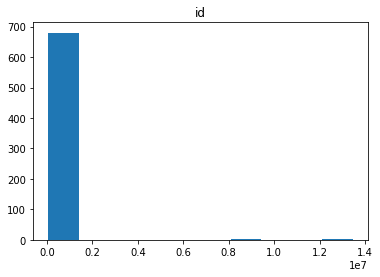

ClumpThickness


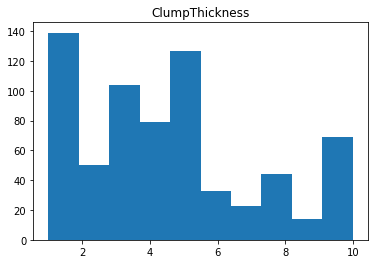

UniformityCellSize


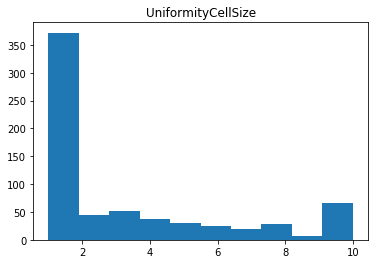

UniformityCellShape


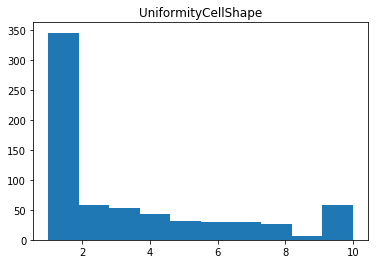

MarginalAdhesion


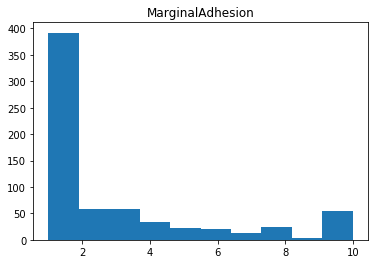

SingleEpithelialCellSize


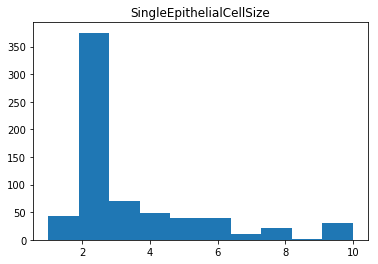

BareNuclei


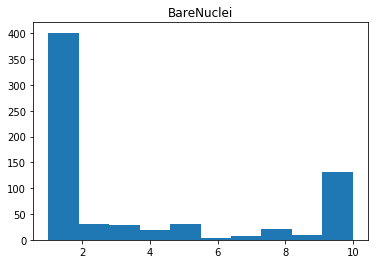

BlandChromatin


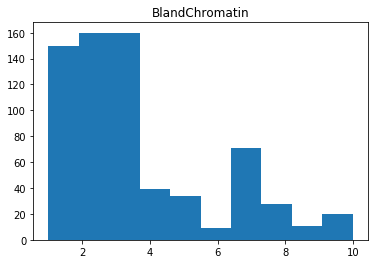

NormalNucleoli


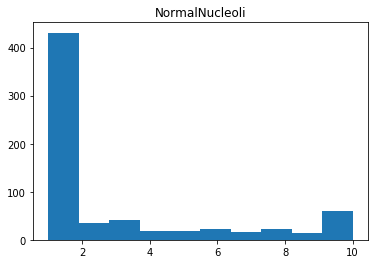

Mitoses


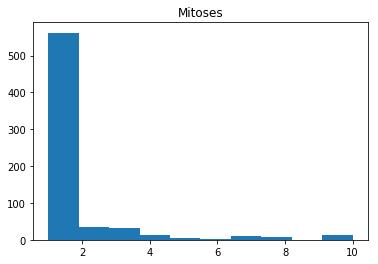

Class


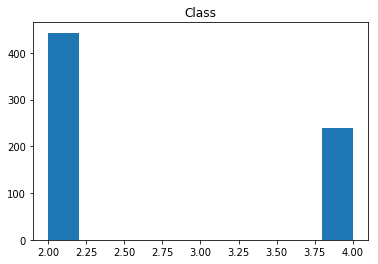

In [18]:
for column in df.columns:
    print(column)
    plt.hist(df[column])
    plt.title(column)
    plt.show()

# Train-Test Split

In [22]:
X = df.drop(['Class'], 1)
y = df['Class']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=0)

# Models

In [24]:
rfc = RandomForestClassifier(n_estimators=10)

In [25]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
rfc.score(X_train, y_train)

0.998165137614679

In [27]:
rfc.score(X_test, y_test)

0.9854014598540146

In [29]:
rfc_report = classification_report(y_test, rfc.predict(X_test))

In [31]:
print(rfc_report)

             precision    recall  f1-score   support

          2       1.00      0.98      0.99        92
          4       0.96      1.00      0.98        45

avg / total       0.99      0.99      0.99       137



In [32]:
pd.crosstab(y_test, rfc.predict(X_test))

col_0,2,4
Class,,
2,90,2
4,0,45
